# **Explorarea unor modele de estimare a obezitatii bazate pe comportamentele / obiceiurile alimentare si conditia fizica**


 Studenta: Flintoaca - Cojocea Cristina - Ioana


# Importarea setului de date si inspectarea generala a acestuia

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Obesity_dataset.csv to Obesity_dataset.csv


In [99]:
df = pd.read_csv('Obesity_dataset.csv')

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.shape

(2111, 17)

In [6]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# Curatarea si procesarea setului de date

In [100]:
# Verificarea valorilor nule din set

df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [101]:
# Calcularea BMI

df['BMI'] = df['Weight'] / ( (df['Height']) ** 2)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [102]:
# Eliminarea coloanelor 'Weight' & 'Height'
df.drop(columns = ['Weight', 'Height'], inplace=True)
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


# Analiza Exploratorie a Datelor

In [11]:
# Explorarea distributiilor

df.describe()

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,2.419043,2.685628,2.008011,1.010298,0.657866,29.700159
std,6.345968,0.533927,0.778039,0.612953,0.850592,0.608927,8.011337
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685
25%,19.947192,2.000000,2.658738,1.584812,0.124505,0.000000,24.325802
50%,22.777890,2.385502,3.000000,2.000000,1.000000,0.625350,28.719089
75%,26.000000,3.000000,3.000000,2.477420,1.666678,1.000000,36.016501
max,61.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753


In [12]:
# Explorarea variabilelor categoriale

df.describe(include = ['object'])

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


### Vizualizarea variabilelor categoriale

<ipython-input-13-dc8a0a466a0b>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(331, title = 'Gender')
<ipython-input-13-dc8a0a466a0b>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(332, title = 'Family history with overweight')
<ipython-input-13-dc8a0a466a0b>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(333, title = 'Frequent consumption of high caloric food')
<ipython-input-13-dc8a0a466a0b>:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

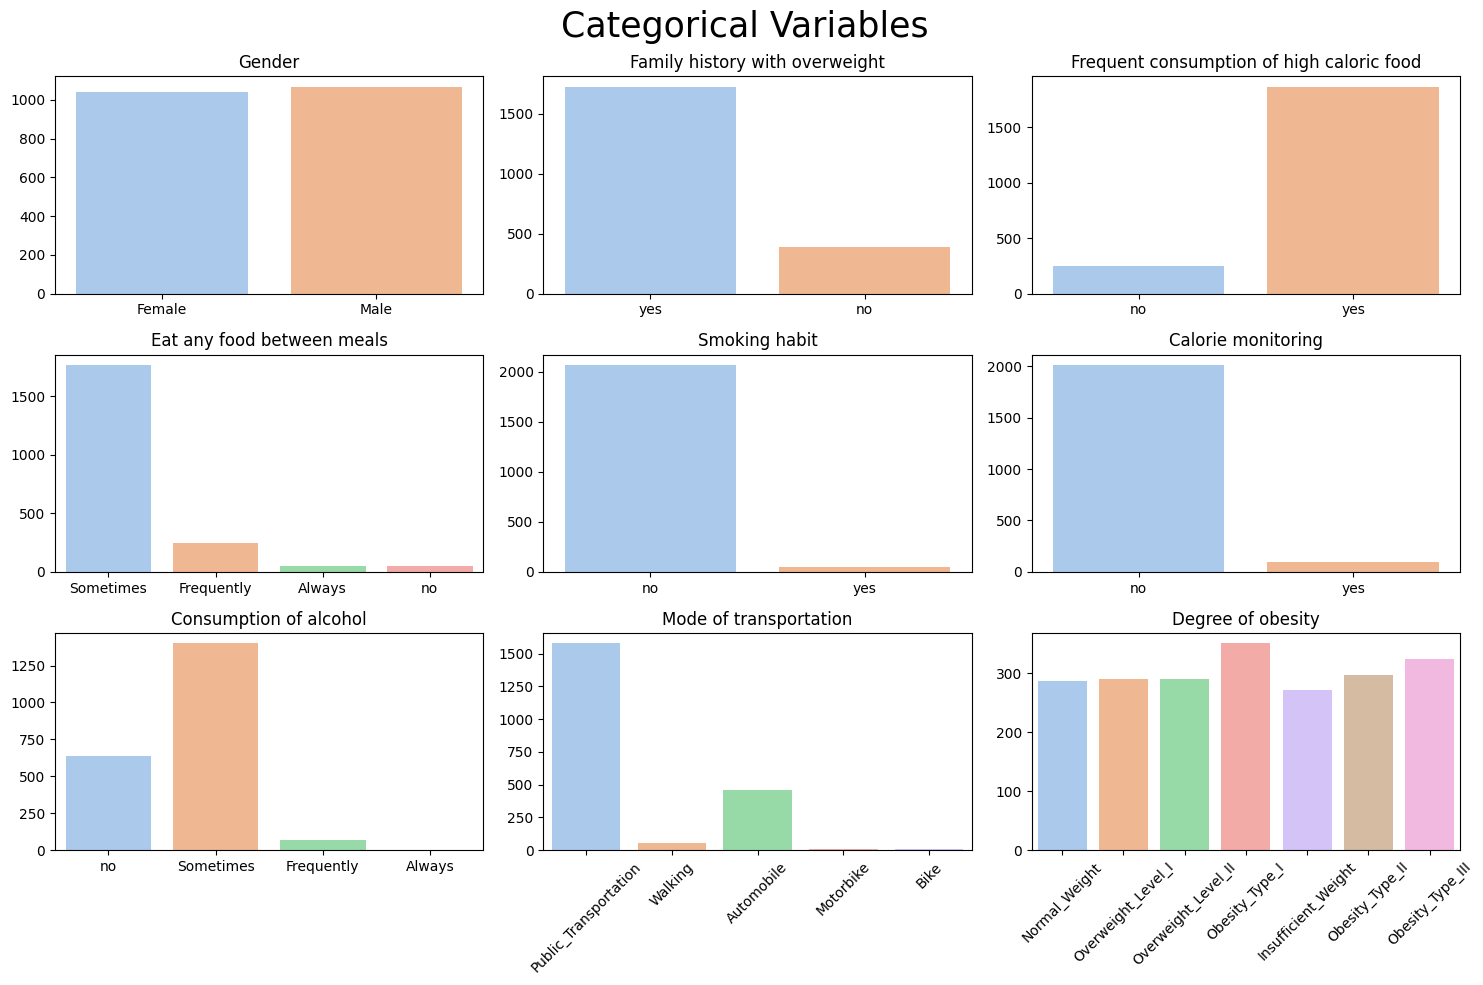

In [13]:
fig, ax = plt.subplots(3, 3, figsize = (15,10))

colors = sns.color_palette("pastel")

plt.subplot(331, title = 'Gender')
sns.countplot(x='Gender', data=df, palette = colors)
plt.xlabel('')
plt.ylabel('')

plt.subplot(332, title = 'Family history with overweight')
sns.countplot(x='family_history_with_overweight', data=df, palette = colors)
plt.xlabel('')
plt.ylabel('')

plt.subplot(333, title = 'Frequent consumption of high caloric food')
sns.countplot(x='FAVC', data=df, palette = colors)
plt.xlabel('')
plt.ylabel('')

plt.subplot(334, title = 'Eat any food between meals')
sns.countplot(x='CAEC', data=df, palette = colors)
plt.xlabel('')
plt.ylabel('')

plt.subplot(335, title = 'Smoking habit')
sns.countplot(x='SMOKE', data=df, palette = colors)
plt.xlabel('')
plt.ylabel('')

plt.subplot(336, title = 'Calorie monitoring')
sns.countplot(x='SCC', data=df, palette = colors)
plt.xlabel('')
plt.ylabel('')

plt.subplot(337, title = 'Consumption of alcohol')
sns.countplot(x='CALC', data=df, palette = colors)
plt.xlabel('')
plt.ylabel('')

plt.subplot(338, title = 'Mode of transportation')
sns.countplot(x='MTRANS', data=df, palette = colors)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')

plt.subplot(339, title = 'Degree of obesity')
sns.countplot(x='NObeyesdad', data=df, palette = colors)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')

fig.suptitle("Categorical Variables", fontsize=25)
plt.tight_layout()
plt.xlabel('')
plt.ylabel('')


plt.show()

### Vizualizarea variabilelor numerice

<ipython-input-14-855ac076b60d>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(241, title = 'Age')
<ipython-input-14-855ac076b60d>:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(245, title = 'Frequency of physical activity')


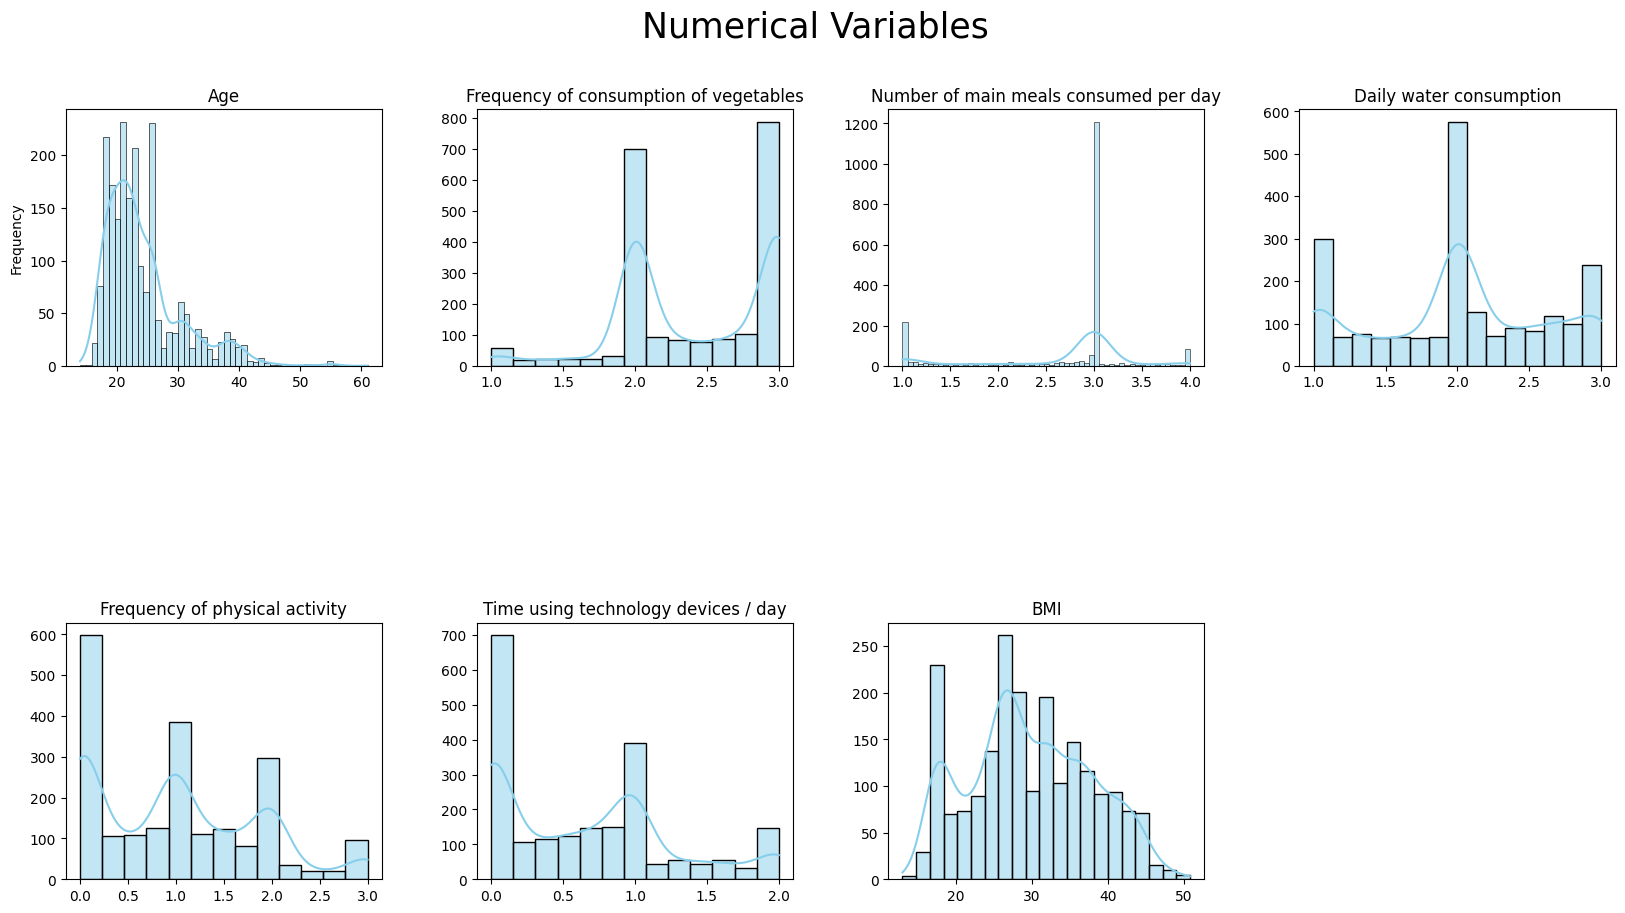

In [14]:
fig = plt.figure(figsize = (20, 10))

ax1 = plt.subplot2grid((8,4), (0,0), colspan=4)
ax2 = plt.subplot2grid((8,4), (2,0), colspan=4)
ax3 = plt.subplot2grid((8,4), (4,0), colspan=4)
ax4 = plt.subplot2grid((8,4), (6,0), colspan=4)

plt.subplot(241, title = 'Age')
sns.histplot(data=df, x='Age', kde=True, color = 'skyblue')
plt.xlabel('')
plt.ylabel('Frequency')

plt.subplot(242, title = 'Frequency of consumption of vegetables')
sns.histplot(data=df, x='FCVC', kde=True, color = 'skyblue')
plt.xlabel('')
plt.ylabel('')

plt.subplot(243, title = 'Number of main meals consumed per day')
sns.histplot(data=df, x='NCP', kde=True, color = 'skyblue')
plt.xlabel('')
plt.ylabel('')

plt.subplot(244, title = 'Daily water consumption')
sns.histplot(data=df, x='CH2O', kde=True, color = 'skyblue')
plt.xlabel('')
plt.ylabel('')

plt.subplot(245, title = 'Frequency of physical activity')
sns.histplot(data=df, x='FAF', kde=True, color = 'skyblue')
plt.xlabel('')
plt.ylabel('')

plt.subplot(246, title = 'Time using technology devices / day')
sns.histplot(data=df, x='TUE', kde=True, color = 'skyblue')
plt.xlabel('')
plt.ylabel('')

plt.subplot(247, title = 'BMI')
sns.histplot(data=df, x='BMI', kde=True, color = 'skyblue')
plt.xlabel('')
plt.ylabel('')


fig.suptitle("Numerical Variables", fontsize=25)
fig.subplots_adjust(hspace=1, wspace=0.3)
plt.show()

In [15]:
# Calcularea skewness & kurtosis pentru a evalua forma distributiilor variabilelor numerice

skewness_value = df.skew(numeric_only = True)
kurtosis_value = df.kurtosis(numeric_only = True)

skewness_table = pd.DataFrame({'Columns': skewness_value.index, 'Skewness': skewness_value.values})
skewness_table.set_index('Columns', inplace=True)
kurtosis_table = pd.DataFrame({'Columns': kurtosis_value.index, 'Kurtosis': kurtosis_value.values})
kurtosis_table.set_index('Columns', inplace=True)

distr_shape_table = pd.concat([skewness_table, kurtosis_table], axis=1)

distr_shape_table

,Skewness,Kurtosis
Columns,,
Age,1.529100,2.826389
FCVC,-0.432906,-0.637546
NCP,-1.107097,0.385527
CH2O,-0.104912,-0.879395
FAF,0.498490,-0.620588
TUE,0.618502,-0.548660
BMI,0.154161,-0.809085


### Verificarea outlierilor

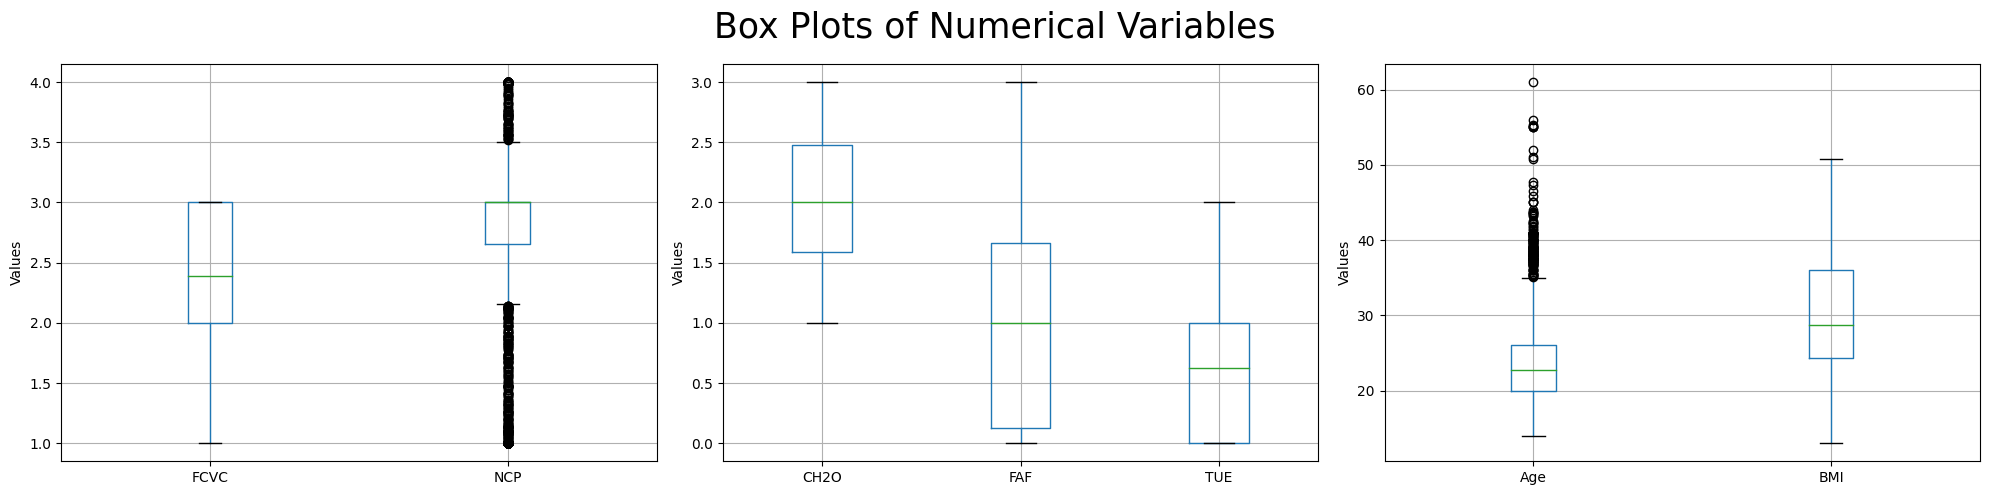

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

plt.subplot(131)
df.boxplot(column=['FCVC', 'NCP'])
plt.ylabel('Values')

plt.subplot(132)
df.boxplot(column=['CH2O', 'FAF', 'TUE'])
plt.ylabel('Values')


plt.subplot(133)
df.boxplot(column=['Age','BMI'])
plt.ylabel('Values')


fig.suptitle("Box Plots of Numerical Variables", fontsize=25)
plt.tight_layout()
plt.show()

In [17]:
# In ceea ce priveste distributia variabilei Age, valorile se afla in intervalul [18-61] care este si intervalul de varsta setat in momentul in care datele au fost colectate.
# Astfel, nu voi elimina outliersii. In ceea ce priveste variabila NCP, graficul de distributie indica faptul ca majoritatea valorilor se clusterizeaza in jurul valorii 3, ceea
# ce inseamna ca outlierii observati sunt variatii reale in setul de date, asadar, ii voi pastra si pe acestia.

### Verificarea relatiilor dintre variabilele categoriale si variabila target (Degree of obesity)

In [18]:
column_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']



In [19]:
# Pentru vizualizare voi folosi tabele de contingenta si barcharts.


# Gender & Degree of Obesity

rel1 = pd.crosstab(df['NObeyesdad'], df['Gender'])
rel1 = rel1.reindex(column_order)
rel1



Gender,Female,Male
NObeyesdad,,
Insufficient_Weight,173,99
Normal_Weight,141,146
Overweight_Level_I,145,145
Overweight_Level_II,103,187
Obesity_Type_I,156,195
Obesity_Type_II,2,295
Obesity_Type_III,323,1


In [20]:
# Family_history_with_overweight & Degree of obesity

rel2 = pd.crosstab(df['NObeyesdad'], df['family_history_with_overweight'])
rel2 = rel2.reindex(column_order)
rel2


family_history_with_overweight,no,yes
NObeyesdad,,
Insufficient_Weight,146,126
Normal_Weight,132,155
Overweight_Level_I,81,209
Overweight_Level_II,18,272
Obesity_Type_I,7,344
Obesity_Type_II,1,296
Obesity_Type_III,0,324


In [21]:
# Frequent consumption of high caloric food (FAVC) & Degree of obesity

rel3 = pd.crosstab(df['NObeyesdad'], df['FAVC'])
rel3 = rel3.reindex(column_order)
rel3

FAVC,no,yes
NObeyesdad,,
Insufficient_Weight,51,221
Normal_Weight,79,208
Overweight_Level_I,22,268
Overweight_Level_II,74,216
Obesity_Type_I,11,340
Obesity_Type_II,7,290
Obesity_Type_III,1,323


In [22]:
# Eating any food between meals & Degree of obesity

rel4 = pd.crosstab(df['NObeyesdad'], df['CAEC'])
rel4 = rel4.reindex(column_order)
rel4


CAEC,Always,Frequently,Sometimes,no
NObeyesdad,,,,
Insufficient_Weight,2,121,146,3
Normal_Weight,35,83,159,10
Overweight_Level_I,5,14,236,35
Overweight_Level_II,3,16,270,1
Obesity_Type_I,6,6,338,1
Obesity_Type_II,2,1,293,1
Obesity_Type_III,0,1,323,0


In [23]:
# Smoking & Degree of Obesity
rel5 = pd.crosstab(df['NObeyesdad'], df['SMOKE'])
rel5 = rel5.reindex(column_order)
rel5



SMOKE,no,yes
NObeyesdad,,
Insufficient_Weight,271,1
Normal_Weight,274,13
Overweight_Level_I,287,3
Overweight_Level_II,285,5
Obesity_Type_I,345,6
Obesity_Type_II,282,15
Obesity_Type_III,323,1


In [24]:
# Calorie Monitoring & Degree of Obesity

rel6 = pd.crosstab(df['NObeyesdad'], df['SCC'])
rel6 = rel6.reindex(column_order)
rel6


SCC,no,yes
NObeyesdad,,
Insufficient_Weight,250,22
Normal_Weight,257,30
Overweight_Level_I,253,37
Overweight_Level_II,286,4
Obesity_Type_I,349,2
Obesity_Type_II,296,1
Obesity_Type_III,324,0


In [25]:
# Consumption of alcohol & Degree of Obesity

rel7 = pd.crosstab(df['NObeyesdad'], df['CALC'])
rel7 = rel7.reindex(column_order)
rel7

CALC,Always,Frequently,Sometimes,no
NObeyesdad,,,,
Insufficient_Weight,0,1,154,117
Normal_Weight,1,18,161,107
Overweight_Level_I,0,16,224,50
Overweight_Level_II,0,19,143,128
Obesity_Type_I,0,14,172,165
Obesity_Type_II,0,2,224,71
Obesity_Type_III,0,0,323,1


In [26]:
# Mode of transportation & Degree of obesity

rel8 = pd.crosstab(df['NObeyesdad'], df['MTRANS'])
rel8 = rel8.reindex(column_order)
rel8

MTRANS,Automobile,Bike,Motorbike,Public_Transportation,Walking
NObeyesdad,,,,,
Insufficient_Weight,46,0,0,220,6
Normal_Weight,45,4,6,200,32
Overweight_Level_I,66,2,1,212,9
Overweight_Level_II,94,0,1,189,6
Obesity_Type_I,110,0,3,236,2
Obesity_Type_II,95,1,0,200,1
Obesity_Type_III,1,0,0,323,0


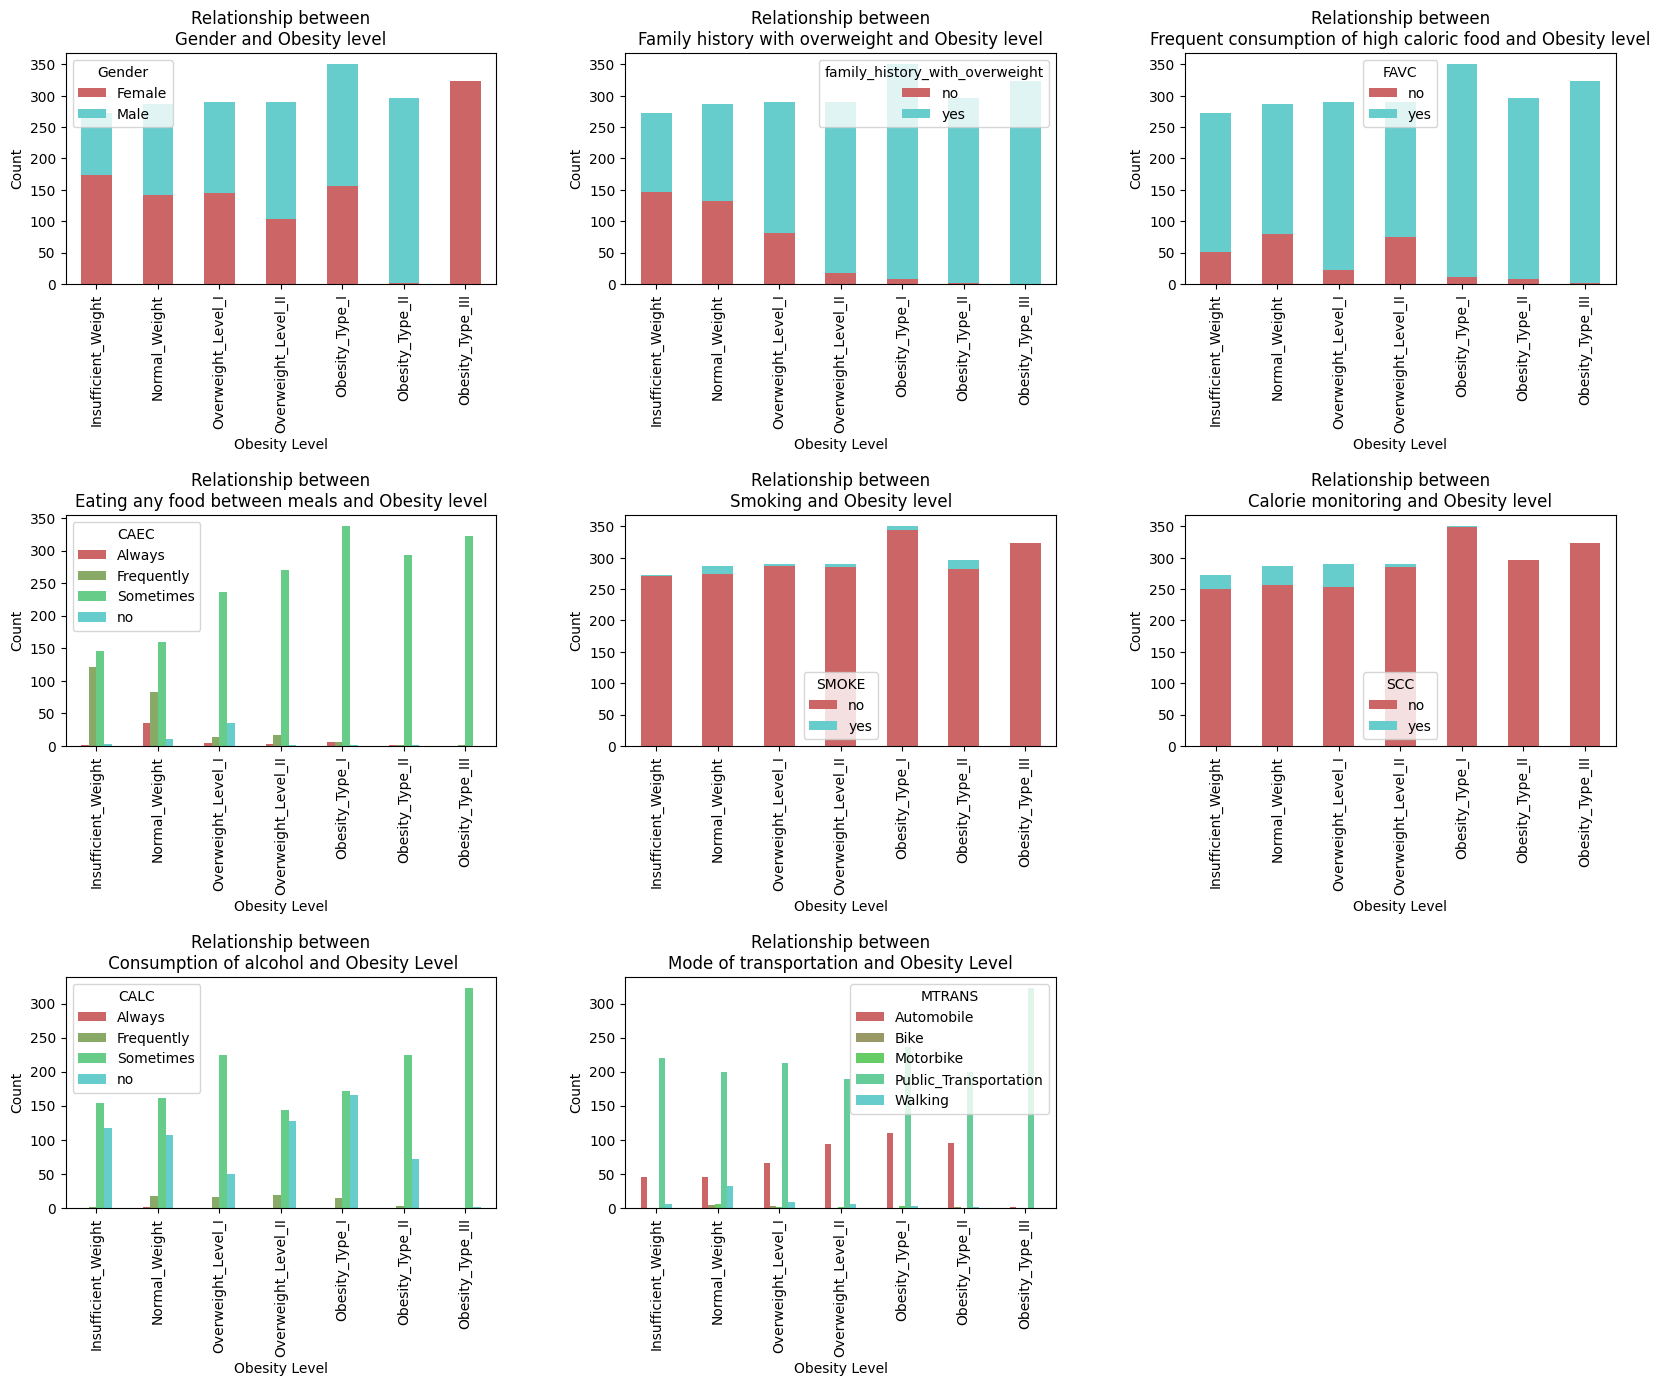

In [27]:
# Vizualizarea relatiilor cu ajutorul graficelor

from matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots(3, 3, figsize=(20, 15))

cdict = {'red':   ((0.0, 0.8, 0.8),
                   (0.5, 0.4, 0.4),
                   (1.0, 0.4, 0.4)),

         'green': ((0.0, 0.4, 0.4),
                   (0.5, 0.8, 0.8),
                   (1.0, 0.8, 0.8)),

         'blue': ((0.0, 0.4, 0.4),
                   (0.5, 0.4, 0.4),
                   (1.0, 0.8, 0.8))}

pastel = LinearSegmentedColormap('pastel', cdict)

# Gender & Degree of Obesity
rel1.plot(kind='bar', stacked=True, ax=ax[0, 0], colormap=pastel)
ax[0, 0].set_xlabel('Obesity Level')
ax[0, 0].set_ylabel('Count')
ax[0, 0].set_title('Relationship between\nGender and Obesity level')

# Family history with overweight & Degree of Obesity
rel2.plot(kind='bar', stacked=True, ax=ax[0, 1],  colormap=pastel)
ax[0, 1].set_xlabel('Obesity Level')
ax[0, 1].set_ylabel('Count')
ax[0, 1].set_title('Relationship between\nFamily history with overweight and Obesity level')

# Frequent consumption of high caloric food & Degree of obesity
rel3.plot(kind='bar', stacked=True, ax=ax[0, 2],  colormap=pastel)
ax[0, 2].set_xlabel('Obesity Level')
ax[0, 2].set_ylabel('Count')
ax[0, 2].set_title('Relationship between\nFrequent consumption of high caloric food and Obesity level')

# Eating any food between meals & Degree of obesity
rel4.plot(kind='bar', stacked=False, ax=ax[1, 0],  colormap=pastel)
ax[1, 0].set_xlabel('Obesity Level')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_title('Relationship between\nEating any food between meals and Obesity level')

# Smoking & Degree of obesity
rel5.plot(kind='bar', stacked=True, ax=ax[1, 1],  colormap=pastel)
ax[1, 1].set_xlabel('Obesity Level')
ax[1, 1].set_ylabel('Count')
ax[1, 1].set_title('Relationship between\nSmoking and Obesity level')

# Calorie Monitoring & Degree of obesity
rel6.plot(kind='bar', stacked=True, ax=ax[1, 2],  colormap=pastel)
ax[1, 2].set_xlabel('Obesity Level')
ax[1, 2].set_ylabel('Count')
ax[1, 2].set_title('Relationship between\nCalorie monitoring and Obesity level')

#  Consumption of alcohol & Degree of obesity
rel7.plot(kind='bar', stacked=False, ax=ax[2, 0],  colormap=pastel)
ax[2, 0].set_xlabel('Obesity Level')
ax[2, 0].set_ylabel('Count')
ax[2, 0].set_title('Relationship between\n Consumption of alcohol and Obesity Level')

# Mode of transportation & Degree of obesity
rel8.plot(kind='bar', stacked=False, ax=ax[2, 1],  colormap=pastel)
ax[2, 1].set_xlabel('Obesity Level')
ax[2, 1].set_ylabel('Count')
ax[2, 1].set_title('Relationship between\nMode of transportation and Obesity Level')

fig.delaxes(ax[2, 2])

fig.subplots_adjust(hspace=1, wspace=0.3)

plt.show()


### Verificarea relatiilor dintre variabilele numerice

<ipython-input-29-3632cc9d75e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)


<Axes: >

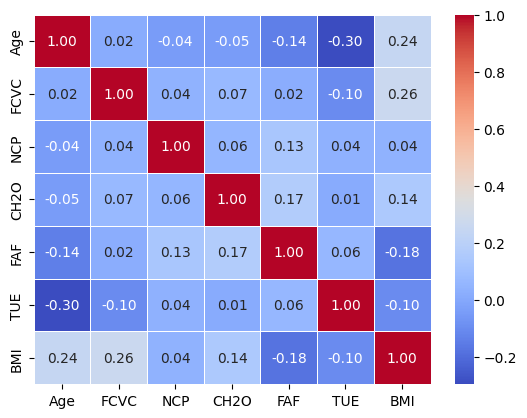

In [29]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

## Modelare

### Convertirea variabilelor categoriale in variabile numerice

In [103]:
# Verificarea tuturor variabilelor categoriale din setul de date

categoriale = []
for var in df.columns:
  if df[var].dtype == object:
    categoriale.append(var)

categoriale

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [104]:
# Verificarea valorilor unice pentru fiecare variabila in parte

def get_value_counts(dataframe, columns=None):
  value_counts_dict = {}

  for var in columns:
      if var in dataframe.columns:
        value_counts_dict[var] = dataframe[var].value_counts()
  return value_counts_dict

result = get_value_counts(df, categoriale)

for var, value_counts in result.items():
  print(f"Value Counts for {var}:")
  print(value_counts)
  print()




Value Counts for Gender:
Male      1068
Female    1043
Name: Gender, dtype: int64

Value Counts for family_history_with_overweight:
yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

Value Counts for FAVC:
yes    1866
no      245
Name: FAVC, dtype: int64

Value Counts for CAEC:
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

Value Counts for SMOKE:
no     2067
yes      44
Name: SMOKE, dtype: int64

Value Counts for SCC:
no     2015
yes      96
Name: SCC, dtype: int64

Value Counts for CALC:
Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

Value Counts for MTRANS:
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

Value Counts for NObeyesdad:
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight

In [105]:
# Variabilele Gender, family_history_with_overweight, FAVC, SMOKE, SCC au doar doua categorii (Y/N) inseamna ca pot fi transformate folosind label encoding (0 si 1)

encoder = LabelEncoder()

col_encodate = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

for col in col_encodate:
  df[col] = encoder.fit_transform(df[col])

df.head()




,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,0,21.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,1,23.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,1,27.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,1,22.0,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [106]:
# Variabilele CAEC, CALC, MTRANS, NObeyesdad au mai mult de doua categorii, ceea ce inseamna ca pentru a le transforma ar trebui sa folosesc un ordinal encoding (practic
# pastrez ordinea categoriilor fara sa fie asumat faptul ca diferentele dintre numere subliniaza existenta unor anumite relatii)

ordinal_encoder = OrdinalEncoder()

col_encodate_2 = ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']

for col2 in col_encodate_2:
  df[col2] = ordinal_encoder.fit_transform(df[[col2]])

df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1,0,2.0,3.0,2.0,0,2.0,0,0.0,1.0,3.0,3.0,1.0,24.386526
1,0,21.0,1,0,3.0,3.0,2.0,1,3.0,1,3.0,0.0,2.0,3.0,1.0,24.238227
2,1,23.0,1,0,2.0,3.0,2.0,0,2.0,0,2.0,1.0,1.0,3.0,1.0,23.765432
3,1,27.0,0,0,3.0,3.0,2.0,0,2.0,0,2.0,0.0,1.0,4.0,5.0,26.851852
4,1,22.0,0,0,2.0,1.0,2.0,0,2.0,0,0.0,0.0,2.0,3.0,6.0,28.342381


In [107]:
# Verific data toate coloanele sunt numerice

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   float64
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

## Train-Test split

In [108]:
# In total sunt 14 predictori si o variabila target (NObeyesdad).

y = df['NObeyesdad']
x = df.drop(['NObeyesdad'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [109]:
# Standardizarea si scalarea (normalizarea) predictorilor atat in train, cat si in test

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


## Regresie Logistica

In [110]:
baseline_model = LogisticRegression(max_iter = 1000, random_state=42)
baseline_model.fit(x_train_scaled, y_train)

# Predictii pe datele de train
baseline_train_preds = baseline_model.predict(x_train_scaled)


In [111]:
# Ma intereseaza sa minimizez numarul de falsi pozitivi pentru ca atunci cand modelul prezice ca cineva ar avea riscul de a suferi de obezitate (outcome pozitiv),
# aceasta predictie sa fie corecta. De aceea, precizia este indicatorul cel mai optim (practic, vreau sa reduc numarul de cazuri in care modelul prezice incorect
# ca o persoana ar avea riscul de a avea obezitate cand de fapt e in afara oricarui risc)

def evaluate_train_precision(train_true, train_pred):

    train_precision = precision_score(train_true, train_pred, average="weighted")
    print(f"Train Precision: {train_precision}")

    return train_precision


precision_baseline_train = evaluate_train_precision(y_train, baseline_train_preds)


Train Precision: 0.747461961256978


In [89]:
# In cazul valorilor prezise ca fiind pozitive (adica peroane care risca sa fie obeze), modelul nostru prezice corect acest risc in 74% din cazurile setului

### Cross-validation

In [50]:
# Motivul pentru care am ales sa folosesc cross-validation ca o principala metoda de evaluare a modelului este pentru ca
# adreseaza problema overfittingului si ofera o estimare mult mai robusta a performantei sale. De asemenea, am ales sa folosesc StratifiedKFold pentru ca
# vreau sa ma asigur ca distributia claselor in fiecare fold este reprezentativa pentru distributia generala a claselor din setul de date, lucru foarte important
# in momentul in care imi doresc sa obtin o estimare exacta a performantei modelului pentru diferite clase. De asemenea, scorul f1_weighted ofera o evaluare mult mai clara
# a performantei modelului comparativ cu acuratetea pentru ca ia in considerare precizia si recallul si ia in considerare problematica claselor imbalanced.



In [112]:
# Standardizare
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Crearea modelului de regresie
reg_log_2 = LogisticRegression(random_state=42)

# Crearea StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation & calcularea preciziei
precision_scorer = make_scorer(precision_score, average='weighted')
cv_scores = cross_val_score(reg_log_2, x_scaled, y, cv=stratified_kfold, scoring = precision_scorer)

# Afisarea rezultatelor
print("Cross-Validation Precision Scores: ", cv_scores)
print("Mean Cross-Validation Precision: ", cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Precision Scores:  [0.90776082 0.89165289 0.876343   0.89512383 0.87395637]
Mean Cross-Validation Precision:  0.8889673820227584


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
## Cross-Validation Precision Scores:  [0.90776082 0.89165289 0.876343   0.89512383 0.87395637]
## Mean Cross-Validation Precision:  0.8889673820227584

In [ ]:
# Modelul cu cross-validation performeaza mult mai bine decat modelul baseline in ceea ce priveste clasificarea corecta a cazurilor pozitive.
# Performanta modelului este consecventa in toate subseturile de date, dupa cum indica valorile apropiate de precizie pentru fiecare fold.
# Precizia medie este aproximativ 0.88 ceea ce arata ca, in medie, modelul prezice corect cazurile pozitive pentru aproximativ 88% din cazurile aflate in setul de date.

### GridSearchCV

In [ ]:
# Motivul pentru care folosesc GridSearchCV este pentru a ma asigura ca modelul este antrenat folosind doar acei hiperparametri care sunt optimi si care
# contribuie la cea mai buna performanta a modelului. GridSerchCV e mai mult o strategie de "cautare" care acopera toate combinatiile posibile de hiperparametri si care
# minimizeaza riscul de overfitting pentru ca modelul nu e antrenat doar pe training data, ci este si testat pe setul de validare.


In [113]:
# Crearea modelului
reg_log_3 = LogisticRegression(max_iter=1000, random_state=42)

# Definirea hiperparametrilor de cautat
param_grid = {
    "penalty": ["l1", "l2"],  #tipul de regularizare
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # inversa puterii de regularizare
    "solver": ["liblinear"],  #Optimizarea coeficientilor modelului (liblinear - potrivit pentru un numar mic de features)
}

# Crearea obiectului de cautare
grid_search = GridSearchCV(reg_log_3, param_grid, cv=5, scoring="accuracy")

grid_search.fit(x_train_scaled, y_train)

# Afisarea celor mai buni hiperparametri
print("Best Hyperparameters:", grid_search.best_params_)

# Gasirea celui mai bun model
best_model = grid_search.best_estimator_

# Predictii pe setul de test folosind cel mai bun model
best_model_preds = best_model.predict(x_train_scaled)

# Evaluarea performantei celui mai bun model atat pe setul de antrenare, cat si pe cel de test
evaluate_train_precision(y_train, best_model_preds)


Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Train Precision: 0.7998453774618225


0.7998453774618225

In [ ]:
# Modelul cu hiperparametri are o precizie mult mai ridicata comparativ cu modelul initial, adica performeaza mai bine din acest punct de vedere. Totusi, performanta sa
# nu depaseste performanta modelului cu cross-validation in ceea ce priveste precizia.

Text(0.5, 1.0, 'Compararea scorurilor de precizie')

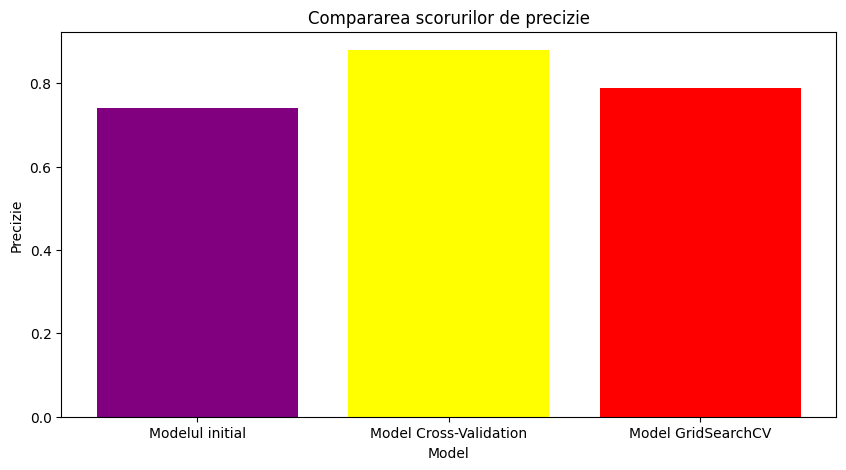

In [114]:
# Vizualizarea performantei modelelor de regresie logistica

precision_scores = {
    "Modelul initial": 0.74,
    "Model Cross-Validation": 0.88,
    "Model GridSearchCV": 0.79
}

## Creez un dataframe cu scorurile
precision_df = pd.DataFrame(list(precision_scores.items()), columns = ['Model', 'Precizie'])

## Grafice
plt.figure(figsize=(10,5))
plt.bar(precision_df['Model'], precision_df['Precizie'], color = ['purple', 'yellow', 'red'])
plt.xlabel('Model')
plt.ylabel('Precizie')
plt.title("Compararea scorurilor de precizie")



In [ ]:
# Atat din scoruri, cat si din grafic putem concluziona ca modelul cross-validated are performanta cea mai buna dintre toate!


# Random Forest

In [115]:
# Crearea unui clasficator random forest
rForest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rForest.fit(x_train_scaled, y_train)

# Predictii pe setul de antrenare
rForest_train_preds = rForest.predict(x_train_scaled)

# Evaluarea performantei modelului cu random forest
evaluate_train_precision(y_train, rForest_train_preds)

Train Precision: 0.9586313440967065


0.9586313440967065

In [ ]:
# In cazul random forest, precizia este aproximativ 0.95 ceea ce inseamna ca acest model este mult mai bun in identificarea corecta a cazurilor pozitive (adica prezicerea
# probabilitatii de a avea obezitate) fara a face la fel de multe predictii fals-pozitive comparativ cu modelele care implicau regresie logistica

## Feature Importance

In [ ]:
# Ma intereseaza sa aflu cat de important este fiecare feature din random forest.

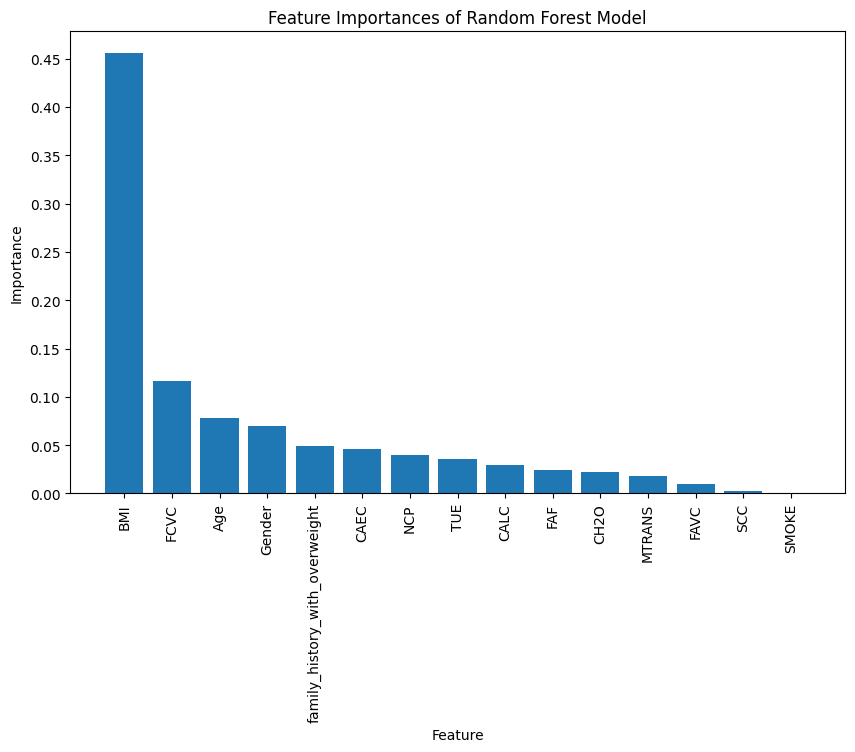

In [122]:
feature_importances = rForest.feature_importances_

feature_names = x.columns #vreau numele caracteristicilor

# Sortare
indices = np.argsort(feature_importances)[::-1]

#Grafice
plt.figure(figsize=(10, 6))
plt.bar(range(x.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(x.shape[1]), feature_names[indices], rotation=90)
plt.yticks(np.arange(0, 0.50, 0.05))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances of Random Forest Model")
plt.show()



In [ ]:
# Dupa cum se poate observa in grafic, BMI are cea mai mare importanta, ceea ce inseamna ca influenteaza foarte puternic predictiile facute de model.
# De asemenea, FCVC, Age, Gender, family_history_with_overweights, CAEC, NCP, TUE contribuie intr-un mod semnificativ la model, comparativ cu celelalte caracteristici.

In [124]:
# Pentru a imbunatati si mai mult modelul, voi restrange caracteristicile pe baza rezultatelor. Observ ca acele caracteristici de la 0.02
# par a fi neimportante pentru model, asadar, stabilesc threshold-ul la 0.02 si refac modelul pentru a verifica daca folosirea unor caracteristici mai putine
# imi ofera o performanta mai buna

# valoarea prag
threshold = 0.02

# identificarea caracteristicilor care au o importanta mai mare de 0.02
selected_features = feature_names[feature_importances > threshold]

# facem un subset din datele de antrenare in asa fel incat sa fie incluse doar caracteristicile
# selectate anterior
x_train_selected = x_train[selected_features]

# Antrenarea modelului
rForest.fit(x_train_selected, y_train)

# Predictii pe setul de antrenare
train_preds_selected = rForest.predict(x_train_selected)

# Evaluarea performantei modelului
evaluate_train_precision(y_train, train_preds_selected)



Train Precision: 0.983840492800401


0.983840492800401

In [ ]:
# Eliminarea caracteristicilor care nu sunt atat de importante modelului imbunatateste performanta modelului la o precizie de 0.98.

# Evaluarea unui model final


In [ ]:
# Modelul final va fi initializat cu cel mai bun model identificat pana acum si cu cei mai buni hiperparametri.
# Am descoperit ca modelul care a performat cel mai bine (adica are cea mai mare precizie) este cel in care am folosit Random Forest doar cu caracteristicile cele mai importante.
# O sa folosesc acest model pentru crearea unui model final care va fi evaluat ulterior pe setul de antrenament si de testare.

In [127]:
final_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

threshold = 0.02

selected_features = feature_names[feature_importances > threshold]
x_train_important = x_train[selected_features]
x_test_important = x_test[selected_features]

final_model.fit(x_train_important, y_train)

# Predictii pe setul de antrenare
final_train_preds = final_model.predict(x_train_important)

# Predictii pe setul de testare
final_test_preds = final_model.predict(x_test_important)

In [128]:
#Calcularea acuratetei si preciziei pentru setul de antrenare si setul de testare

def evaluate_model_performance(train_true, train_pred, test_true, test_pred):

    # Precizia setului de antrenare
    train_precision = precision_score(train_true, train_pred, average="weighted")
    print(f"Train Precision: {train_precision}")

     # Precizia setului de testare
    test_precision = precision_score(test_true, test_pred, average="weighted")
    print(f"Test Precision: {test_precision}")

    print("------------")

    # Acuratetea setului de antrenare
    train_accuracy = accuracy_score(train_true, train_pred)
    print(f"Train Accuracy: {train_accuracy}")

    # Acuratetea setului de testare
    test_accuracy = accuracy_score(test_true, test_pred)
    print(f"Test Accuracy: {test_accuracy}")

    print("------------")

    # Recall pentru setul de antrenare
    train_recall = recall_score(train_true, train_pred, average="weighted")
    print(f"Train Recall: {train_recall}")

    # Recall pentru setul de testare
    test_recall = recall_score(test_true, test_pred, average="weighted")
    print(f"Test Recall: {test_recall}")

    print("------------")

    # Scorul F1 pentru setul de antrenare
    train_f1 = f1_score(train_true, train_pred, average="weighted")
    print(f"Train F1 Score: {train_f1}")

    # Scorul F1 pentru setul de testare
    test_f1 = f1_score(test_true, test_pred, average="weighted")
    print(f"Test F1 Score: {test_f1}")

# Evaluarea performantei modelului
evaluate_model_performance(y_train, final_train_preds, y_test, final_test_preds)


Train Precision: 0.983840492800401
Test Precision: 0.9592867605166844
------------
Train Accuracy: 0.983575489576753
Test Accuracy: 0.9583333333333334
------------
Train Recall: 0.983575489576753
Test Recall: 0.9583333333333334
------------
Train F1 Score: 0.9835329159570994
Test F1 Score: 0.9581995259009333


In [ ]:
# Observ ca, in cazul modelului cu Random Forest, scorurile intre antrenare si testare au un nivel ridicat de consecventa. Precizia atat pentru setul de
# antrenare, cat si pentru setul de testare are o valoare foarte mare, ceea ce inseamna ca modelul face predictii pozitive corecte in peste 90% din cazuri.
# Avand in vedere performantele similare intre setul de antrenare si cel de testare, consider ca modelul nu are probleme de overfitting. Modelul cu random forest pare
# ca reuseste cel mai bine sa generalizeze date noi comparativ cu modelele cu regresie logistica initiate anterior.